In [7]:
pip install pandas numpy matplotlib yfinance

Note: you may need to restart the kernel to use updated packages.


In [35]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as ps
import seaborn as sns
import matplotlib.colors as mcolors

In [41]:
import yfinance as yf

sp500 = yf.Ticker("^GSPC")

data = sp500.history(period = '50y')

returns_df = data

In [42]:
returns_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1975-09-08 00:00:00-04:00,85.620003,86.309998,84.889999,85.889999,11500000,0.0,0.0
1975-09-09 00:00:00-04:00,85.889999,86.730003,84.370003,84.599998,15790000,0.0,0.0
1975-09-10 00:00:00-04:00,84.589996,84.589996,83.000000,83.790001,14780000,0.0,0.0
1975-09-11 00:00:00-04:00,83.790001,84.300003,82.879997,83.449997,11100000,0.0,0.0
1975-09-12 00:00:00-04:00,83.449997,84.470001,82.839996,83.300003,12230000,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-29 00:00:00-04:00,6489.279785,6491.759766,6444.569824,6460.259766,4234840000,0.0,0.0
2025-09-02 00:00:00-04:00,6401.509766,6416.540039,6360.580078,6415.540039,4784000000,0.0,0.0
2025-09-03 00:00:00-04:00,6445.819824,6453.669922,6416.169922,6448.259766,4465360000,0.0,0.0


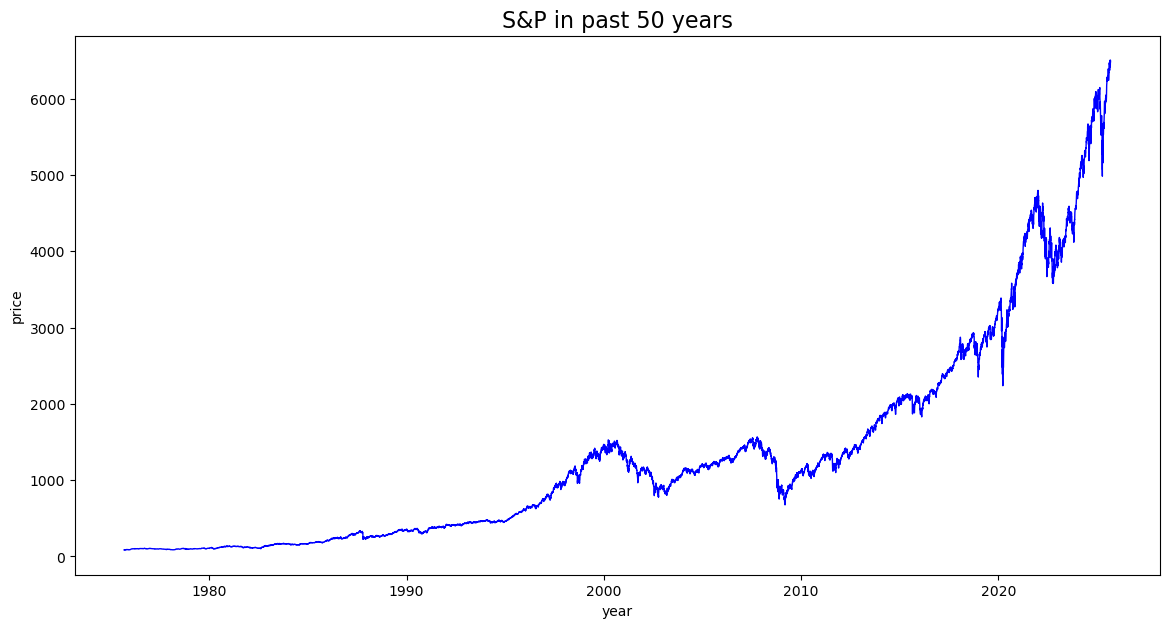

In [44]:
plt.figure(figsize = (14,7))
plt.plot(data['Close'], linewidth=1 , color = 'blue')
plt.title('S&P in past 50 years', fontsize=16)
plt.xlabel('year')
plt.ylabel('price')
plt.savefig('sp500_history.png')
plt.show()

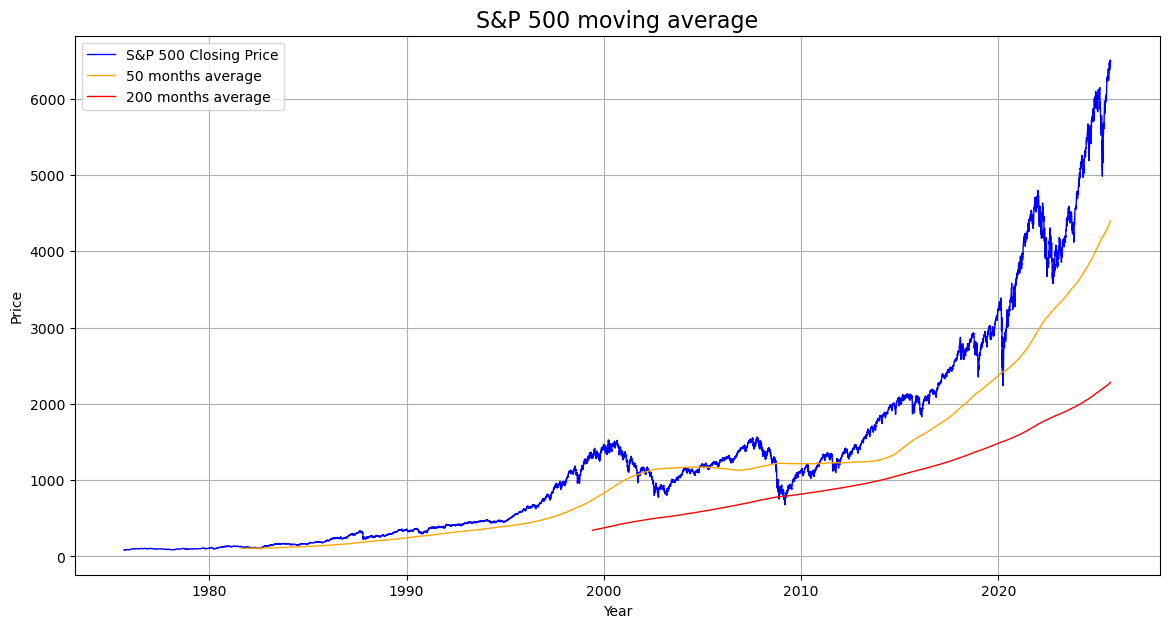

In [48]:
data['MA50'] = data['Close'].rolling(window=50*30).mean()
data['MA200'] = data['Close'].rolling(window=200*30).mean()

plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='S&P 500 Closing Price', linewidth=1, color='blue')
plt.plot(data['MA50'], label='50 months average', linewidth=1, color='orange')
plt.plot(data['MA200'], label='200 months average', linewidth=1, color='red')
plt.title('S&P 500 moving average', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig('sp500_with_ma.png')
plt.show()

In [58]:
data['Year'] = data.index.year 

annual_returns = data.groupby('Year')['Close'].apply(
    lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100
)

annual_returns.describe()

count    51.000000
mean      9.901448
std      15.520235
min     -37.584650
25%       1.103192
50%      11.588958
75%      20.995499
max      34.157394
Name: Close, dtype: float64

In [62]:
years = annual_returns.index.tolist()
returns_values = annual_returns.values.tolist()

import math
n_rows = 5
n_cols = math.ceil(len(years) / n_rows)

heatmap_data = []
for i in range(n_rows):
    row = []
    for j in range(n_cols):
        idx = i * n_cols + j
        if idx < len(returns_values):
            row.append(returns_values[idx])
        else:
            row.append(None)
    heatmap_data.append(row)

year_labels = []
for i in range(n_rows):
    row = []
    for j in range(n_cols):
        idx = i * n_cols + j
        if idx < len(years):
            row.append(str(years[idx]))
        else:
            row.append("")
    year_labels.append(row)

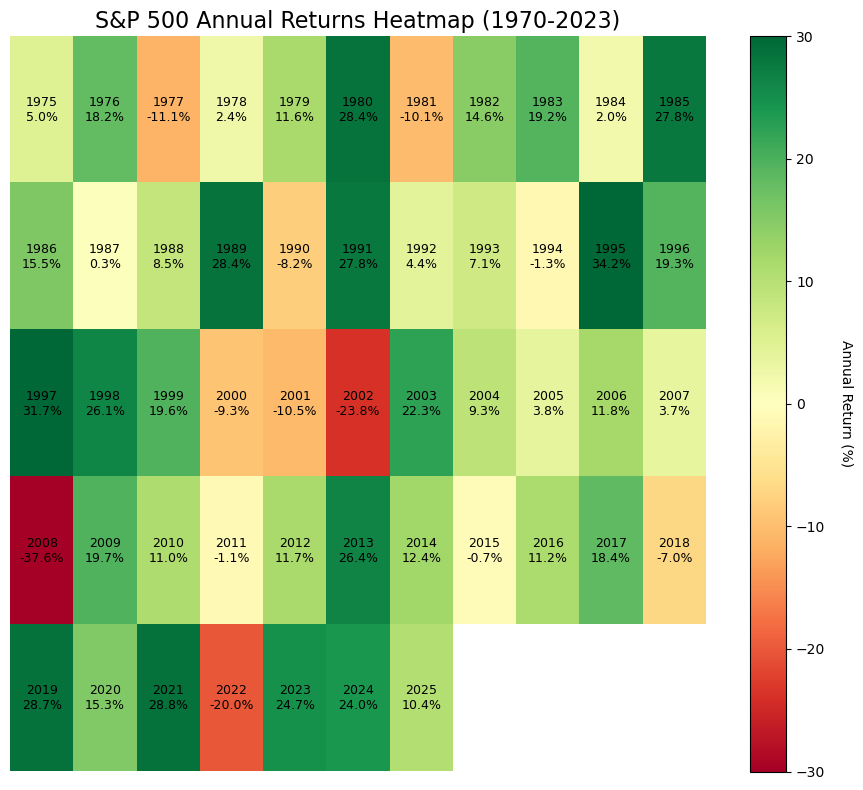

In [70]:
heatmap_array = np.array(heatmap_data, dtype=float)

mask = np.isnan(heatmap_array)

plt.figure(figsize=(9, 8))

masked_data = np.ma.masked_where(mask, heatmap_array)

im = plt.imshow(masked_data, cmap='RdYlGn', aspect='auto', 
                vmin=-30, vmax=30)  

cbar = plt.colorbar(im)
cbar.set_label('Annual Return (%)', rotation=270, labelpad=20)

for i in range(len(heatmap_data)):
    for j in range(len(heatmap_data[0])):
        if not mask[i, j]:  
            text = plt.text(j, i, f"{year_labels[i][j]}\n{heatmap_array[i,j]:.1f}%",
                           ha="center", va="center", color="black", fontsize=9)

plt.grid(which='both', color='black', linestyle='-', linewidth=0.5, alpha=0.3)
plt.gca().set_xticks(np.arange(-0.5, len(heatmap_data[0]), 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, len(heatmap_data), 1), minor=True)

plt.title("S&P 500 Annual Returns Heatmap (1970-2023)", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.savefig('sp500_annual_returns_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()